# **K-Means Clustering in Python **
For this tutorial, you will need the following **Python packages:**

*   [numpy](http://www.numpy.org/)
*   [scikit-learn](https://scikit-learn.org/stable/index.html)
*   [matplotlib](https://matplotlib.org/index.html)
*   [pandas](https://pandas.pydata.org/)

---

# **Import Libraries**
Let's start our script by first importing the required libraries:



In [0]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# **Prepare data**
The next step is to prepare the data that we want to cluster. Let's create a numpy array of 15 rows and 2 columns. We create a numpy array of data points because the Scikit-Learn library can work with numpy array type data inputs without requiring any preprocessing.

In [0]:
data = np.array([[5,3], [7,10], [20,21], [30,25], [10,15], [15,12], [24,10], [30,45], [85,70], [62,67], [71,80], [70,60], [60,78], [55,52], [80,91],])

# **Visualize the Data**

In [0]:
plt.scatter(data[:,0],data[:,1])
plt.show()

# **Create Clusters**
To create a K-means cluster with two clusters, simply type the following script:

In [0]:
km = KMeans(n_clusters=2)
km.fit(data)

 In the first line, you create a** KMeans object** and pass it **2 **as value for** n_clusters** parameter. 
 
 Next, you simply have to call the **fit method** on** kmeans** and pass the **data** that you want to cluster.

---



**Now let's see what centroid values the algorithm generated for the final clusters. **

In [0]:
print(km.cluster_centers_) 

The output will be a two dimensional array of shape 2 x 2 (since we passed n_cluster parameter as = 2). 

---



**To see the labels for the data point, execute the following script.**

In [0]:
print(km.labels_) 

The output is a one dimensional array of 15 elements corresponding to the clusters assigned to our 15 data points.

(Here 0 and 1 are merely used to represent cluster IDs and have no mathematical significance. If there were three clusters, the third cluster would have been represented by digit 2.)

---



**Let's plot the data points again on the graph and visualize how the data has been clustered.** 

This time we will plot the data along with their assigned label so that we can distinguish between the clusters. Execute the following script:

In [0]:
plt.scatter(data[:,0],data[:,1], c=km.labels_, cmap='rainbow')  
plt.show()

Here we are plotting the first column of the data array against the second column, however in this case we are also passing km.labels_ as value for the c parameter that corresponds to labels. The cmap='rainbow' parameter is passed for choosing the color type for the different data points. 

---





Now let's** plot the points along with the centroid coordinates of each cluster to see how the centroid positions effects clustering.**

In [0]:
plt.scatter(data[:,0], data[:,1], c=km.labels_, cmap='rainbow')  
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black',marker="x")  
plt.show()

**Compute Inter-Cluster Distance:**

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
print("->Coordinates of Centroid:\n",km.cluster_centers_)

dists = euclidean_distances(km.cluster_centers_)
print("\n->Distance between Centroids of two Clusters:\n",dists)

tri_dists = dists[np.triu_indices(2, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

print("\n->Maximum Distance:",max_dist)
print("->Average Distance:",avg_dist)
print("->Minimum Distance:",min_dist)

**Compute Intra-Cluster Distance:**

In [0]:
print("->Coordinates of Centroid:\n",km.cluster_centers_)
distances = []
for i, centroid in enumerate(km.cluster_centers_):
    data_array = []
    print("\n->Coordinates of Centroid ",i,":",centroid)
    for (x,y) in data[km.labels_ == i]:
      data_array.append([x,y])
    
    print("->Data points in Cluster",i,":", data_array)
    
    mean_distance = euclidean_distances(data_array,[centroid])
    print("->Distance between all points and centroid in cluster",i,":\n",mean_distance)
    distances.append(mean_distance)
    print("################################################################################")
  
print("\n***Distances=\n",distances)

# **A simple case study of K-Means in Python:**



## > **Dataset loading utilities**

The [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html).package embeds some small toy datasets.


##> **Toy datasets**
Scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

They can be loaded using the following functions:

**load_boston([return_X_y])**	Load and return the boston house-prices dataset (regression).

**load_iris([return_X_y])**	Load and return the iris dataset (classification).

**load_diabetes([return_X_y])**	Load and return the diabetes dataset (regression).

**load_digits([n_class, return_X_y])**	Load and return the digits dataset (classification).

**load_linnerud([return_X_y])**	Load and return the linnerud dataset (multivariate regression).

**load_wine([return_X_y])**	Load and return the wine dataset (classification).

**load_breast_cancer([return_X_y])**	Load and return the breast cancer wisconsin dataset (classification).



In [0]:
from sklearn import datasets

For the implementation part, we will be using **Iris dataset** available at Sklearn Library.

# **Iris plants dataset:**

**Data Set Characteristics:**

> * **Number of Instances:** 150 (50 in each of three classes)

>* **Number of Attributes:** 4 numeric, predictive attributes and the class

>* **Attribute Information:**
 	
>>  * sepal length in cm
>>  * sepal width in cm
>>  * petal length in cm
>>  * petal width in cm

>* **class:**
>>  * Iris-Setosa
>>  * Iris-Versicolour
>>  * Iris-Virginica

In [0]:
iris = datasets.load_iris()
df = iris.data[:, :2]  # we only take the first two features.

In [0]:
#plotting
plt.scatter(df[:,0],df[:,1])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [0]:
#KMeans
km_iris = KMeans(n_clusters=4)
km_iris.fit(df)

print("Cluster Centers:\n",km_iris.cluster_centers_)

In [0]:
#Plotting
plt.scatter(df[:,0],df[:,1], c=km_iris.labels_, cmap='rainbow')  
plt.scatter(km_iris.cluster_centers_[:,0] ,km_iris.cluster_centers_[:,1], color='black',marker="X")

plt.title("K Means", fontsize=14)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

 **Compute Inter-cluster Distance:**

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
print("->Coordinates of Centroid:\n",km_iris.cluster_centers_)

dists = euclidean_distances(km_iris.cluster_centers_)
print("\n->Distance between Centroids of two Clusters:\n",dists)

tri_dists = dists[np.triu_indices(4, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

print("\n->Maximum Distance:",max_dist)
print("->Average Distance:",avg_dist)
print("->Minimum Distance:",min_dist)

**Computer Intra-cluster Distance:**

In [0]:
print("->Coordinates of Centroid:\n",km_iris.cluster_centers_)
distances = []
for i, centroid in enumerate(km_iris.cluster_centers_):
    data_array = []
    print("\n->Coordinates of Centroid ",i,":",centroid)
    for (x,y) in df[km_iris.labels_ == i]:
      data_array.append([x,y])
    
    print("->Data points in Cluster",i,":", data_array)
    
    mean_distance = euclidean_distances(data_array,[centroid])
    print("->Distance between all points and centroid in cluster",i,":\n",mean_distance)
    distances.append(mean_distance)
    print("################################################################################")
  
print("\n***Distances=\n",distances)



---



# **Example: Applying K-Means Clustering To Delivery Fleet Data:**

We'll only be looking at **two driver features**: 
> * mean distance driven per day and

> * the mean percentage of time a driver was >5 mph over the speed limit.

In this example, we will fed **4000 records of drivers data** into K-Means algorithm  and cluster data based on similarities between each data point,** identify the groups of drivers with distinct features based on distance and speed.**



**Importing and Preparing Data :**

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving driver_data.csv to driver_data.csv


In [0]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['driver_data.csv'].decode('utf-8')))
dataset

In [0]:
f1=dataset['Distance_Feature'].values
f2=dataset['Speeding_Feature'].values
X=np.array(list(zip(f1,f2)))
print(X)

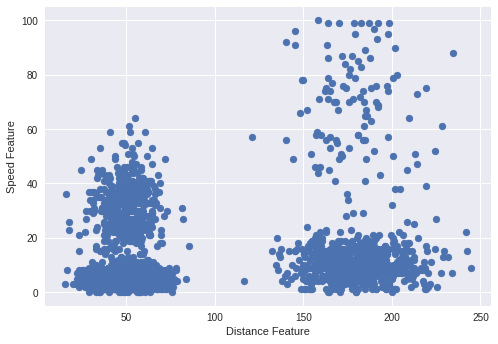

In [0]:
#plotting
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Distance Feature')
plt.ylabel('Speed Feature')
plt.show()

The chart above shows the dataset for 4,000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.

In [0]:
#KMeans
km_driver = KMeans(n_clusters=4)
km_driver.fit(X)

print("Cluster Centers:\n",km_driver.cluster_centers_)

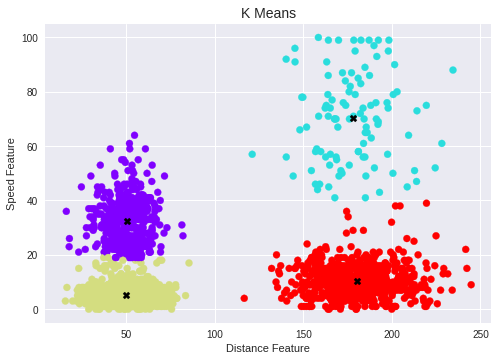

In [0]:
#Plotting
plt.scatter(X[:,0],X[:,1], c=km_driver.labels_, cmap='rainbow')  
plt.scatter(km_driver.cluster_centers_[:,0] ,km_driver.cluster_centers_[:,1], color='black',marker="X")

plt.title("K Means", fontsize=14)
plt.xlabel('Distance Feature')
plt.ylabel('Speed Feature')
plt.show()

**In conclusion**, as a result of our analysis we can see that there are four main groups of drivers:

>**Cluster 1 **– Short distance, low speed

>**Cluster 2** – Short distance, medium speed

>**Cluster 3** – Long distance, low speed

>**Cluster 4** – Long distance, high speed 